## Drawing from a Hawkes Process

In [28]:
%matplotlib inline
import numpy as np
import scipy as sp
from matplotlib import pyplot as plt

In [42]:
def hawkes_draw(T, mu, alpha, beta):
    """
    Draw from a univariate Hawkes process with
    exponential  kernel $-\alpha * \exp(-\beta * (t - t'))$
    """
    if alpha >= beta:
        raise ValueError("Not stationary!")
        
    if np.min([mu, alpha, beta]) < 0:
        raise ValueError("Parameters cannot be zero!")

    arr = []
    s, n = 0, 0

    while s < T:
        lda_bar = mu + np.sum(alpha * np.exp(- beta * (s - np.array(arr))))

        u = np.random.rand()
        w = - np.log(u) / lda_bar

        s += w

        D = np.random.rand()
        if D * lda_bar <= mu + np.sum(alpha * np.exp(- beta * (s - np.array(arr)))):
            n += 1
            arr.append(s)

    if arr[-1] > T:
        arr = arr[:-1]
        
    return arr


Looks clustered...

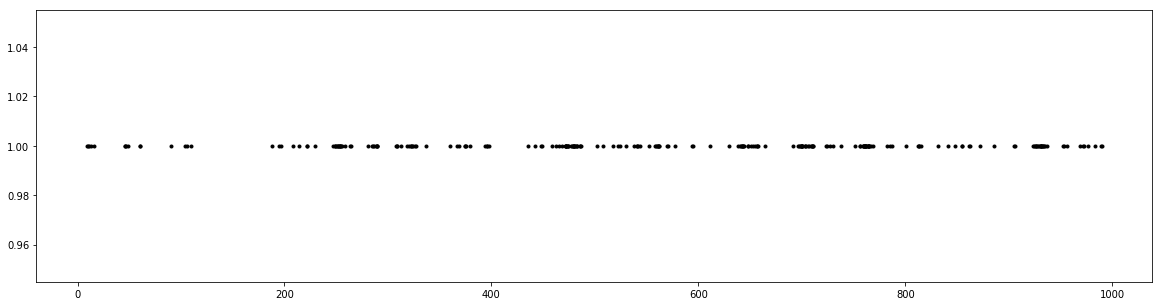

In [41]:
arr = hawkes_draw(1000, .1, .3, .5)

plt.figure(figsize=(20,5))
plt.plot(np.array(arr), np.ones(len(arr)), 'k.')